In [1]:
import numpy as np
import ceo
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N_SIDE_LENSLET=90
n = N_SIDE_LENSLET*32
gmt = ceo.GMT_MX()

In [3]:
src = ceo.Source('V',zenith=0,azimuth=0,
                rays_box_size=25.5,
                rays_box_sampling=n,
                rays_origin=[0,0,25])
src>>(gmt,)
+src
src.wavefront.rms(-9)

array([0.75930273])

In [13]:
pym = ceo.Pyramid(N_SIDE_LENSLET,n,modulation=3.0)
src>>(gmt,pym)

(@CEO)>Pyramid: Set modulation sampling to 36


In [14]:
pym.modulation_sampling = 64

In [15]:
%%time
+src

CPU times: user 327 ms, sys: 145 ms, total: 473 ms
Wall time: 471 ms


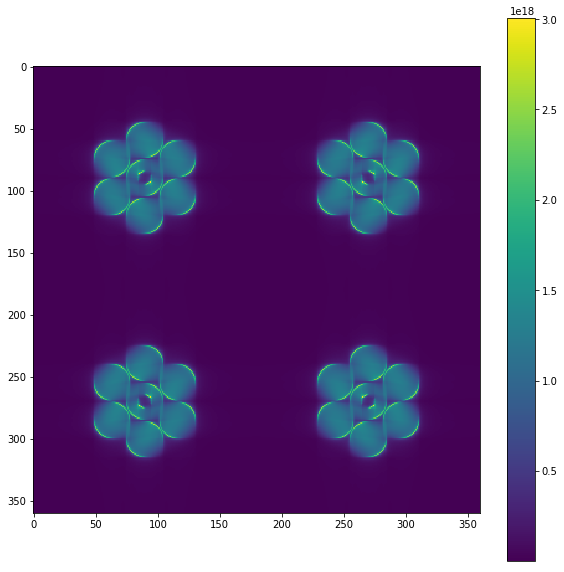

In [16]:
fig = plt.figure()
fig.set_size_inches(10,10)
plt.imshow(pym.camera.frame.host())
plt.colorbar()

In [17]:
src.rays.rot_angle = np.pi/12
pym.camera.reset()
+src

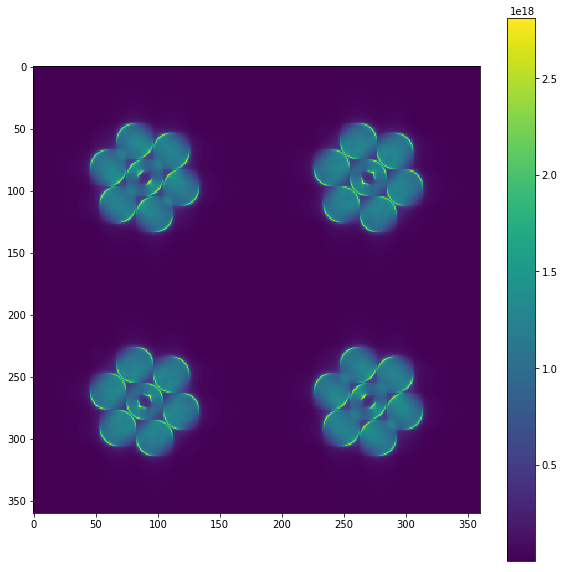

In [18]:
fig = plt.figure()
fig.set_size_inches(10,10)
plt.imshow(pym.camera.frame.host())
plt.colorbar()